# Open Street Map

In this lab, you will learn how to:
* use various python libraries to search for and download Open Street Map *building* data
* categorize buildings by type
* visualize buildings on a map
* create a function to produce building maps
* create a loop to produce building maps for multiple locations

Note that we will learn how to use street network analysis with OSMnx in subsequent labs.

![osm](images/OSM.png)
What is open street map?
- https://www.openstreetmap.org/

OSMnx
- library documentation (https://osmnx.readthedocs.io)
- github (https://github.com/gboeing/osmnx)
- Examples and demos are available at: https://github.com/gboeing/osmnx-examples


## Download visualizing Open Street Map data

OSMnx lets you download data from Open Street Map.

You can download OSM data by providing OSMnx any of the following:
  - a bounding box
  - a lat-long point plus a distance
  - an address plus a distance
  - a place name or list of place names (to automatically geocode and get the boundary of)
  - a polygon of the desired street network's boundaries
  - a .osm formatted xml file

[OSMNx source](https://github.com/gboeing/osmnx/blob/99f4b1566a22f2a4dd3763190f8d0f3efa2a9b7f/osmnx/geometries.py)

<div class="alert alert-info">
    
`osmnx` uses nominatim to geocode and find places. Make sure that the geography you search for is searchable here first:

https://nominatim.openstreetmap.org/ui/search.html

</div>

For the sake of clarity, and effective use of a workshop setting, let's use the "address plus a distance" method to download a street network dataset.

## Import the libraries

In [1]:
# to download osm data
import osmnx as ox

# to manipulate data
import pandas as pd

# for interactive plots
import plotly.express as px

# to manipulate and visualize spatial data
import geopandas as gpd

# to provide basemaps 
import contextily as ctx

# to give more power to your figures (plots)
import matplotlib.pyplot as plt

## Define an area of interest

In [24]:
address = '京都市'

In [25]:
%%time
# %%time is a magic command to see how long it takes this cell to run 

# get the data from OSM that are tagged as 'building' for a 1000m X 1000m square area
osm = ox.geometries_from_address(address,tags={'building':True},dist=1000)

CPU times: user 1.71 s, sys: 122 ms, total: 1.83 s
Wall time: 8.82 s


<div class="alert alert-danger">
    
<h2>Be careful!</h2>

Buildings are the "heaviest" data types to download, as they often encompass thousands of polygons. While you are technically capable of downloading buildings for entire neighborhoods and cities, doing so can easily overwhelm your notebook. Start small, and scale up!
</div>

In [26]:
# how many rows and columns?
osm.shape

(15996, 108)

In [27]:
# what is the datatype?
type(osm)

TypeError: 'str' object is not callable

In [28]:
# show me 10 random rows
osm.sample(10)

source  \
element_type osmid                             
way          260697406  GSI/KIBAN 2500; NARO   
             547951342  GSI/KIBAN 2500; NARO   
             548120770                   NaN   
             544147922                   NaN   
             549358173                  bing   
             262767746  GSI/KIBAN 2500; NARO   
             552407206                   NaN   
             562759977                   NaN   
             548135693                   NaN   
             543690616                   NaN   

                                                                 geometry  \
element_type osmid                                                          
way          260697406  POLYGON ((135.75508 35.02488, 135.75522 35.024...   
             547951342  POLYGON ((135.75507 35.02345, 135.75516 35.023...   
             548120770  POLYGON ((135.75893 35.01825, 135.75893 35.018...   
             544147922  POLYGON ((135.74783 35.01812, 135.74790 35.018...   
             549358173  POLYGON ((135.75112 35.02893, 135.75114 35.028...   
             262767746  POLYGON ((135.75371 35.02283, 135.75381 35.022...   
             552407206  POLYGON ((135.76212 35.01618, 135.76217 35.016...   
             562759977  POLYGON ((135.74630 35.02656, 135.74638 35.026...   
             548135693  POLYGON ((135.75314 35.01925, 135.75324 35.019...   
             543690616  POLYGON ((135.75022 35.02141, 135.75027 35.021...   

                       name name:en name:ja name:ja_kana name:ru building  \
element_type osmid                                                          
way          260697406  NaN     NaN     NaN          NaN     NaN      yes   
             547951342  NaN     NaN     NaN          NaN     NaN      yes   
             548120770  NaN     NaN     NaN          NaN     NaN      yes   
             544147922  NaN     NaN     NaN          NaN     NaN      yes   
             549358173  NaN     NaN     NaN          NaN     NaN      yes   
             262767746  NaN     NaN     NaN          NaN     NaN      yes   
             552407206  NaN     NaN     NaN          NaN     NaN      yes   
             562759977  NaN     NaN     NaN          NaN     NaN      yes   
             548135693  NaN     NaN     NaN          NaN     NaN      yes   
             543690616  NaN     NaN     NaN          NaN     NaN      yes   

                       note note:ja  ... outdoor_seating internet_access  \
element_type osmid                   ...                                   
way          260697406  NaN     NaN  ...             NaN             NaN   
             547951342  NaN     NaN  ...             NaN             NaN   
             548120770  NaN     NaN  ...             NaN             NaN   
             544147922  NaN     NaN  ...             NaN             NaN   
             549358173  NaN     NaN  ...             NaN             NaN   
             262767746  NaN     NaN  ...             NaN             NaN   
             552407206  NaN     NaN  ...             NaN             NaN   
             562759977  NaN     NaN  ...             NaN             NaN   
             548135693  NaN     NaN  ...             NaN             NaN   
             543690616  NaN     NaN  ...             NaN             NaN   

                       power landuse building:wall building:colour  \
element_type osmid                                                   
way          260697406   NaN     NaN           NaN             NaN   
             547951342   NaN     NaN           NaN             NaN   
             548120770   NaN     NaN           NaN             NaN   
             544147922   NaN     NaN           NaN             NaN   
             549358173   NaN     NaN           NaN             NaN   
             262767746   NaN     NaN           NaN             NaN   
             552407206   NaN     NaN           NaN             NaN   
             562759977   NaN     NaN           NaN             NaN  

## Eliminate unnecessary columns
The dataframe has 100+ columns. Let's explore what these are, and which ones are necessary for our use.

What are the datatypes and count of null values?

In [29]:
osm.info(verbose=True, show_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
MultiIndex: 15996 entries, ('node', 1422960130) to ('relation', 13780901)
Data columns (total 108 columns):
 #    Column                       Non-Null Count  Dtype   
---   ------                       --------------  -----   
 0    source                       4499 non-null   object  
 1    geometry                     15996 non-null  geometry
 2    name                         271 non-null    object  
 3    name:en                      86 non-null     object  
 4    name:ja                      27 non-null     object  
 5    name:ja_kana                 21 non-null     object  
 6    name:ru                      23 non-null     object  
 7    building                     15996 non-null  object  
 8    note                         22 non-null     object  
 9    note:ja                      6 non-null      object  
 10   source_ref                   2594 non-null   object  
 11   addr:block_number            4 non-null      object  
 12   

Really, what we need is just...

In [30]:
## subset it
columns_to_keep = ['geometry','building']
osm = osm[columns_to_keep]
osm.head(10)

geometry  \
element_type osmid                                                           
node         1422960130                         POINT (135.75884 35.02958)   
             1422960263                         POINT (135.75700 35.02186)   
             1422962871                         POINT (135.75564 35.02603)   
             2376684948                         POINT (135.75111 35.02543)   
way          99019129    POLYGON ((135.75128 35.01325, 135.75127 35.013...   
             99019130    POLYGON ((135.75100 35.01275, 135.75110 35.012...   
             99019131    POLYGON ((135.75086 35.01386, 135.75098 35.013...   
             99019133    POLYGON ((135.75077 35.01301, 135.75077 35.012...   
             99019140    POLYGON ((135.75025 35.01265, 135.75025 35.012...   
             99019146    POLYGON ((135.75042 35.01312, 135.75043 35.013...   

                        building  
element_type osmid                
node         1422960130   public  
             1422960263   public  
             1422962871   public  
             2376684948   school  
way          99019129        yes  
             99019130        yes  
             99019131     retail  
             99019133        yes  
             99019140        yes  
             99019146       roof

### Cleaning up unspecified building types

Wait, what is the "yes" building type? According to OSM's wiki page, this is a building of "[unspecific type](https://wiki.openstreetmap.org/wiki/Tag:building%3Dyes)", used when someone is unable or unwilling to tag it more specifically.

With this in mind, let's change "yes" to "unspecified". To do so, we will use the `.loc` function as documented [here](https://www.geeksforgeeks.org/how-to-replace-values-in-column-based-on-condition-in-pandas/)

In [31]:
osm.loc[osm['building']=='yes','building'] = 'unspecified'

# Make a building type chart

Let's create a dataframe for building types. We can do this with a nifty series of chained code functions in a single line.

In [32]:
osm_building_counts = osm.value_counts(['building']).reset_index(name="count")
osm_building_counts

,building,count
0,unspecified,15833
1,apartments,40
2,retail,17
3,wall,16
4,roof,14
5,school,13
6,office,10
7,university,9
8,house,9
9,residential,8


## Create a bar chart

To start, the simplest method to create a bar plot in python is to simply add `plot.bar` to the dataframe.

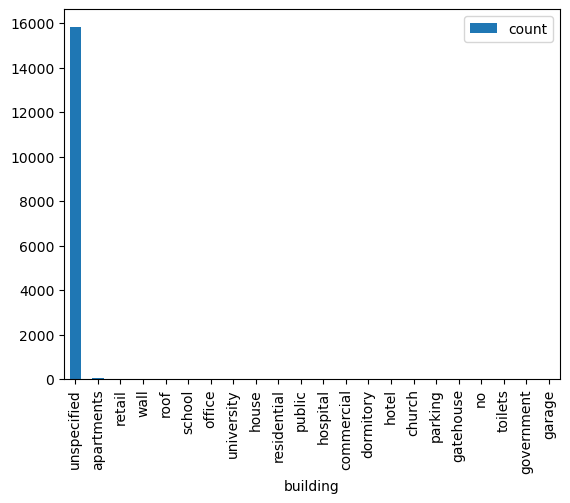

In [33]:
osm_building_counts.plot.bar(x='building');

Now output it again, but this time, only show the "Top 10."

Take the extra mile to make it pretty!

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 24066 (\N{CJK UNIFIED IDEOGRAPH-5E02}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 20140 (\N{CJK UNIFIED IDEOGRAPH-4EAC}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning:

Glyph 37117 (\N{CJK UNIFIED IDEOGRAPH-90FD}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/

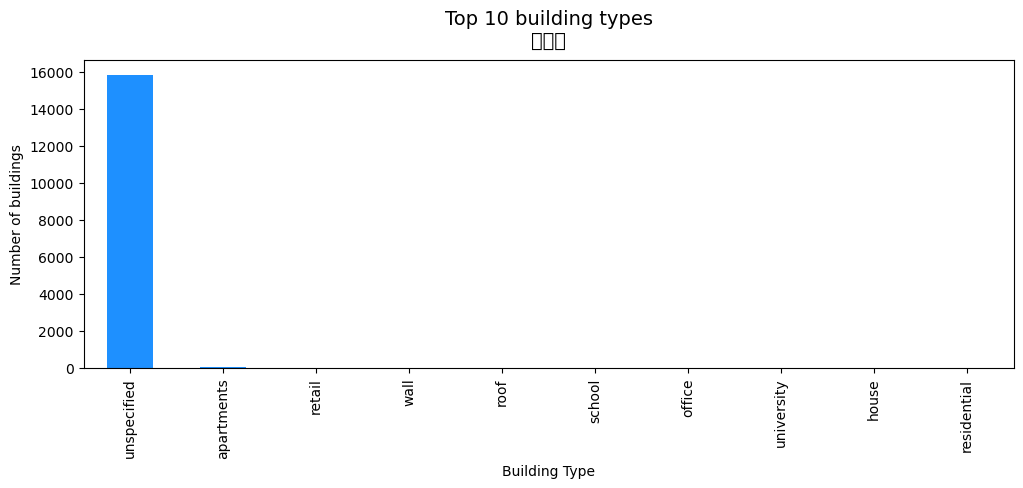

In [34]:
fig, ax = plt.subplots(figsize=(12,4))

osm_building_counts[:10].plot.bar(ax=ax,
                                      x='building',
                                      y='count',
                                      legend=False,
                                      color='dodgerblue'
                                      )
ax.set_xlabel('Building Type') # override x label
ax.set_ylabel('Number of buildings') # override y label
ax.set_title("Top 10 building types\n"+address,fontsize=14,pad=10); # multi-line title with padding

### Going the extra "extra" mile

The chart that was just created uses Matplotlib, which has long been a standard in Python libraries. 

Here we introduce [plotly](https://plotly.com/python/bar-charts/) as the charting library, which comes with preconfigured thematic "[templates](https://plotly.com/python/templates/)" that allow us to generate various charts with differing design principles.

In the code cell below, you can replace "plotly_white" with any of the following values to experiment with different designs for your charts.

Choose from:
- `ggplot2`
- `seaborn`
- `simple_white`
- `plotly`,
- `plotly_white`
- `plotly_dark`
- `presentation`
- `xgridoff`,
- `ygridoff`
- `gridon`
- `none`

In [35]:
# import the themes
import plotly.io as pio
pio.templates.default = "plotly_white"

In [36]:
# bar chart
fig = px.bar(osm_building_counts.head(10),
        x='building',
        y='count',
        title="Top 10 building types in "+address, # title
        text_auto = True,
        height=600,
        width=900,
        color_discrete_sequence =['slategray']*len(osm_building_counts), # single color for all the bars
        labels={
                'count': 'Number of buildngs',
                'building': 'Type of building',
        })

# bar label
fig.update_traces(textposition='outside',textfont_size=10,textfont_color='#444')

# axes labels
fig.update_yaxes(title_font_size=12,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)
fig.update_xaxes(title_font_size=10,title_font_color='#aaa',tickfont_color='#aaa',tickfont_size=9)

# show the figure
fig.show()

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/plotly/io/_renderers.py:395: DeprecationWarning:

distutils Version classes are deprecated. Use packaging.version instead.



<div class="alert alert-info">

Now it's your turn! Search for an area of interest, anywhere in the world, and create a bar plot of building types.
    
Take a screengrab or save the resulting image, and paste it into this <a href="https://docs.google.com/document/d/1u1b4r6j9Av-u3LZnzE5CL_fblss7EWnEXoSBKQ_Ao9Y/edit#" target="_blank">Google Document</a>.
</div>

# Geopandas Map Plots

Let's return to the original OSM data we downloaded. Remember that the OSMnx `geometries_from_address` command returned a geodataframe of buildings. Let's plot them:

<AxesSubplot: >

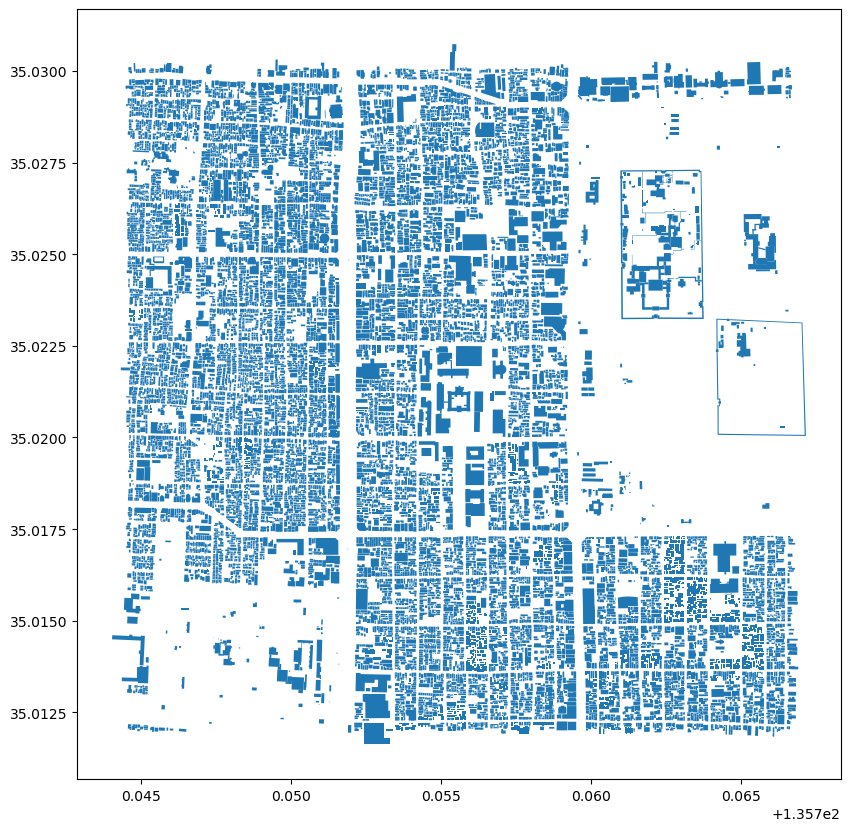

In [37]:
# plot entire dataset
osm.plot(figsize=(10,10))

<AxesSubplot: >

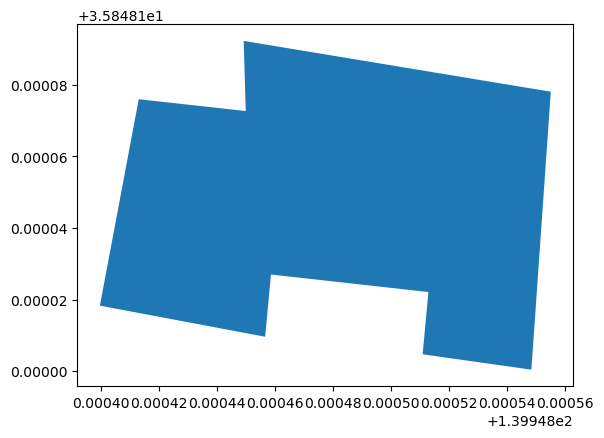

In [16]:
# plot a single random building
osm.sample(1).plot()

## Color coding buildings
Use the `column` argument to assign a column in the dataframe to color the polygons. If the column is numerical, it will poduce a numerically sequential map. If the column is categorical, it will produce a categorically colored map (a different color assigned to each distinct category).

You can use the `cmap` argument to assign a color palette. Find all the available options for `cmap` here:
- https://matplotlib.org/3.1.1/gallery/color/colormap_reference.html

<AxesSubplot: >

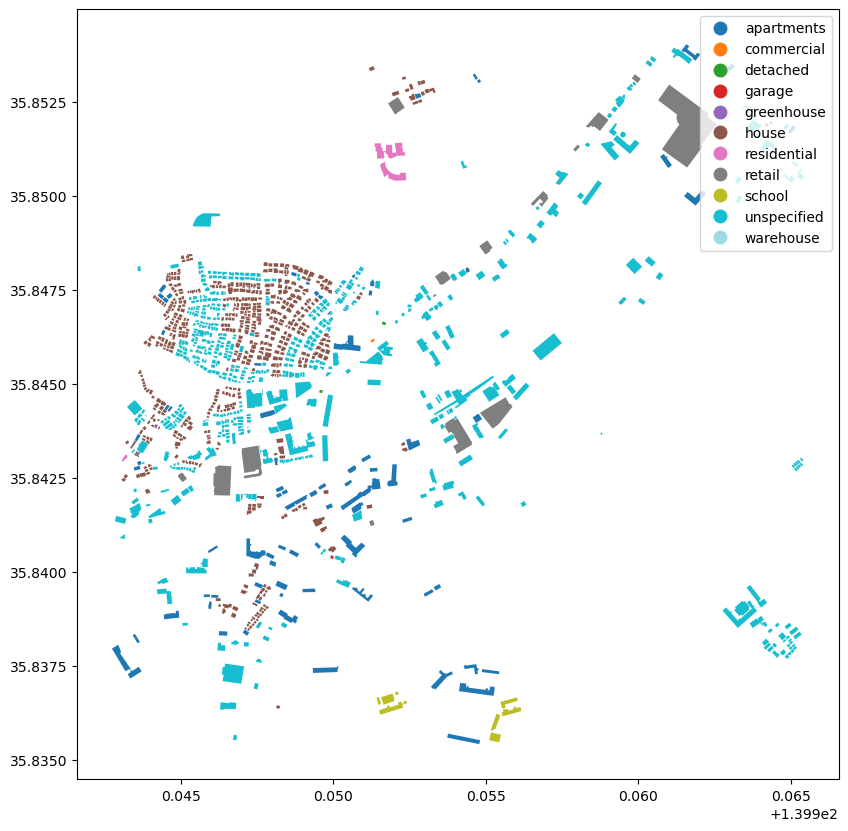

In [17]:
osm.plot(figsize=(10,10),
         column='building',
         cmap='tab20',
         legend=True)

## Clean up: Add a title, move the legend, remove axis

### Move the legend

Moving the legend is surprisingly difficult to do. There are two key/value pairs that you need to pass using the `legend_kwds` argument. The `loc` and `bbox_to_anchor` values allow you to locate the legend outside the plot. Here is a good explanation of how that is done:

* https://stackoverflow.com/questions/4700614/how-to-put-the-legend-out-of-the-plot/43439132#43439132

### Add a title
Use `ax.set_title()` to add a title to the chart.

### Remove the axis

Turn off the axis with the `ax.axis('off')` statement.



/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 21335 (\N{CJK UNIFIED IDEOGRAPH-5357}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 26575 (\N{CJK UNIFIED IDEOGRAPH-67CF}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 12288 (\N{IDEOGRAPHIC SPACE}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 21315 (\N{CJK UNIFIED IDEOGRAPH-5343}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events.py:89: UserWarning:

Glyph 33865 (\N{CJK UNIFIED IDEOGRAPH-8449}) missing from current font.

/Users/yohkawano/opt/anaconda3/envs/geos/lib/python3.11/site-packages/IPython/core/events

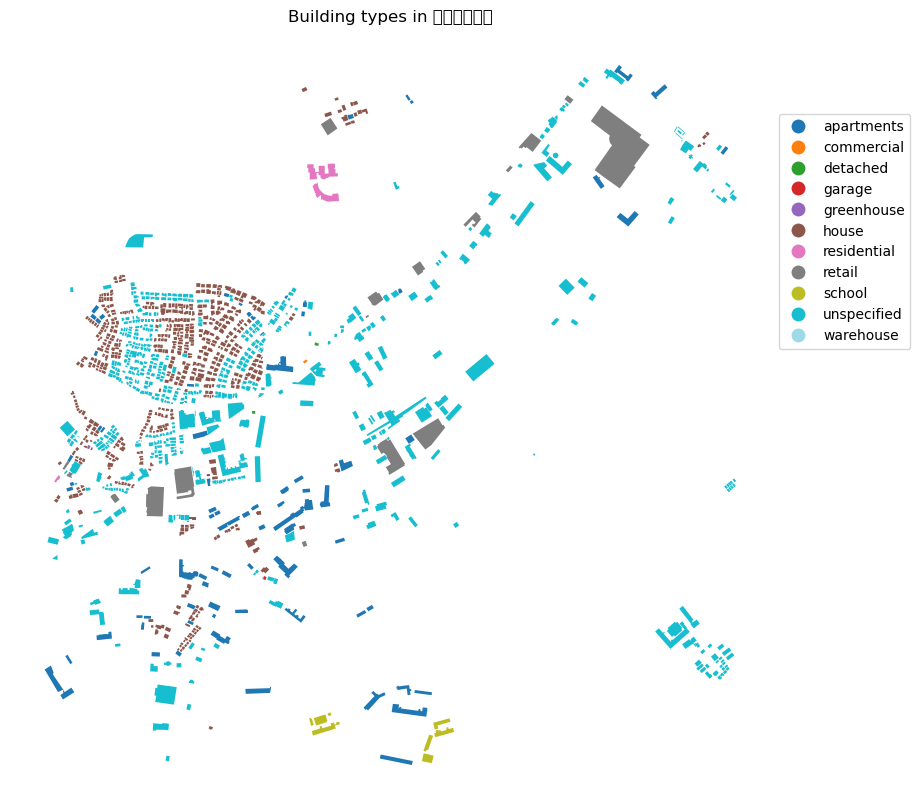

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

# create the map plot
osm.plot(ax=ax,
         column='building',
         cmap='tab20',
         legend=True,
         legend_kwds={'loc':'upper left','bbox_to_anchor':(1,.9)})

# add a title
ax.set_title('Building types in ' + address)

# get rid of the axis
ax.axis('off');

### Taking it to the next level

Choropleth maps are created, and left to be... as-is. Ask yourself, will your audience be able to get the most out of your graphic? In fact, choropleth maps are all too often seen as a means to an end, when in fact, they are perhaps the biggest cartographic overuse. Instead, solicit your audience through the use of binary maps, which allow the eyes to more easily detect patterns, convey visual information with greater clarity, and are frankly,  aesthically engaging.

Consider that your graph is a two-dimensional map of an urban space that shows the relationship between what something is and what it is not, built and unbuilt spaces. Using a solid black infill for certain spaces and a light gray color for other spaces mimics a historically popular design approach known as the figure-ground diagram, popularized by urban artists from the 17th century. Consider the specter of Giambattista Nolli's plan of Rome in 1748:

<img src="images/Nolli 1748.jpeg">

In more modern times, figure-ground diagrams have been used to depict urban morphology, the study of the formation of human habitats and their transformation of urban form over time. Modern urbanists such as Geoff Boeing (author of the OSMNX library used in this session) have coined the term "data-driven urban morphology" by combining big data and computation to explore urban spaces through the modeling of spatial data. The sudden and open availability of OSM data for locations all over the world have enabled practitioners to visualize urban phenomena across cities.

<img src="images/urban morphology.jpg" width=600>

Image from "[Spatial information and the legibility of urban form: Big data in urban morphology](ttps://www.sciencedirect.com/science/article/pii/S0268401219302154)," Geoff Boeing, 2021. One square mile of each city’s street network and building footprints, comparing US cities to informal settlements in the Global South.

With just a few weeks under our belts as spatial data scientists, do we dare presume to generate similar graphics of interest? Let's give it a shot.

Goal: To create a series of maps, with each map highlighting a single building type as a figure-ground diagram.

### Step 1: Calculate the map bounds of your data

In order to make sure that each map has the same extent (bounds), assign the min/max x/y's using the `total_bounds` function ([documentation](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.total_bounds.html)).

In [19]:
# get min/max bounds of lat/lon
minx = osm.total_bounds[0]
miny = osm.total_bounds[1]
maxx = osm.total_bounds[2]
maxy = osm.total_bounds[3]

### Step 2: Create a building type list

Use the `unique()` function to find distinct building types, and put it in a python list.

In [20]:
# get unique buiding types in a list
buildingtypes = osm['building'].unique().tolist()
buildingtypes

['unspecified',
 'retail',
 'apartments',
 'residential',
 'commercial',
 'house',
 'school',
 'warehouse',
 'garage',
 'greenhouse',
 'detached']

### Step 3: Create a loop for each buidling type

Now that we have the list of building types, we can loop through each building type and create individual maps. 

**Beware** Loops are super powerful operations in any programming language. Make sure that what you ask is *reasonable* to the computational resources available.

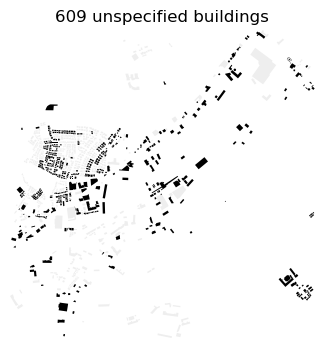

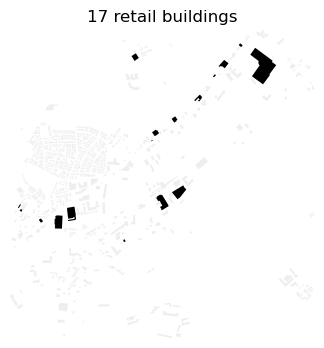

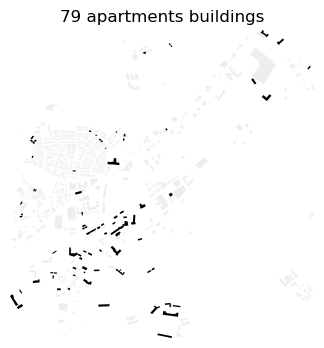

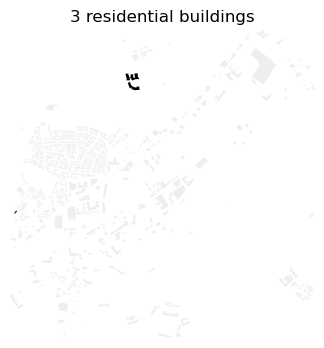

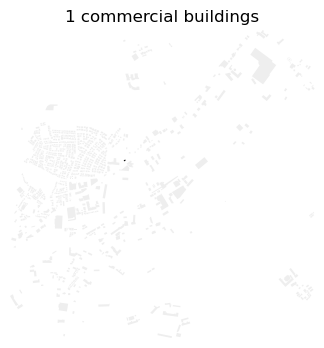

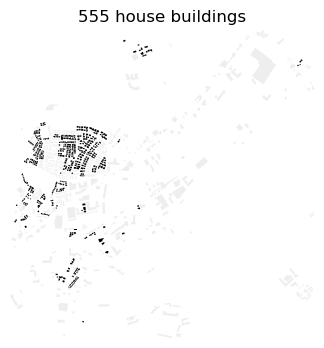

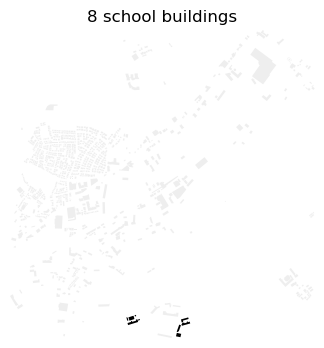

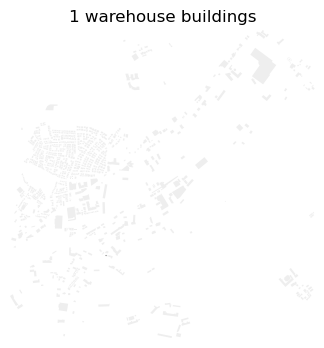

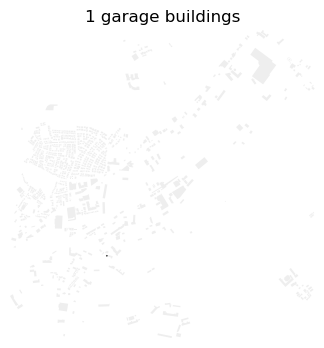

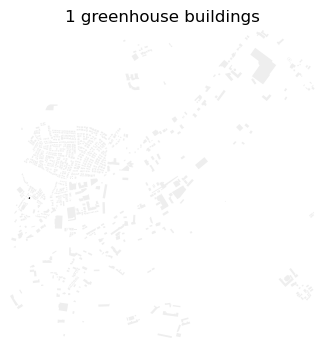

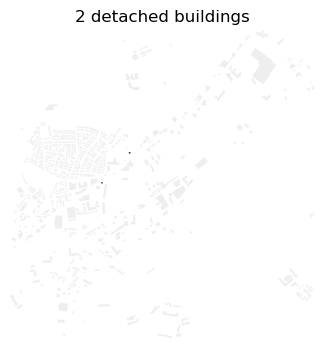

In [21]:
# loop through building types
for type in buildingtypes:
    fig, ax = plt.subplots(figsize=(4,4))

    # create the map plot
    osm.plot(ax=ax,
            # column='building',
            color='#eee')

    # create the map plot
    osm[osm['building'] == type].plot(ax=ax,
            # column='building',
            color='black')

    # set the extent of the map 
    # so that each map has the same bounds
    ax.set_xlim((minx,maxx))
    ax.set_ylim((miny,maxy))

    # add a title
    number_of_buildings = len(osm[osm['building']==type])
    ax.set_title(str(number_of_buildings) + ' ' + type + ' buildings')

    # get rid of the axis
    ax.axis('off');

## Add a basemap

Adding a basemap to a geopandas plot can be done using the contextily library. To do so, you must:

* reproject your geodataframe to Web Mercator (epsg: 3857)
* add a basemap, use the following guidelines: https://github.com/geopandas/contextily

In [22]:
# reproject to Web Mercator
osm_web_mercator = osm.to_crs(epsg=3857)

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x1945c2480>

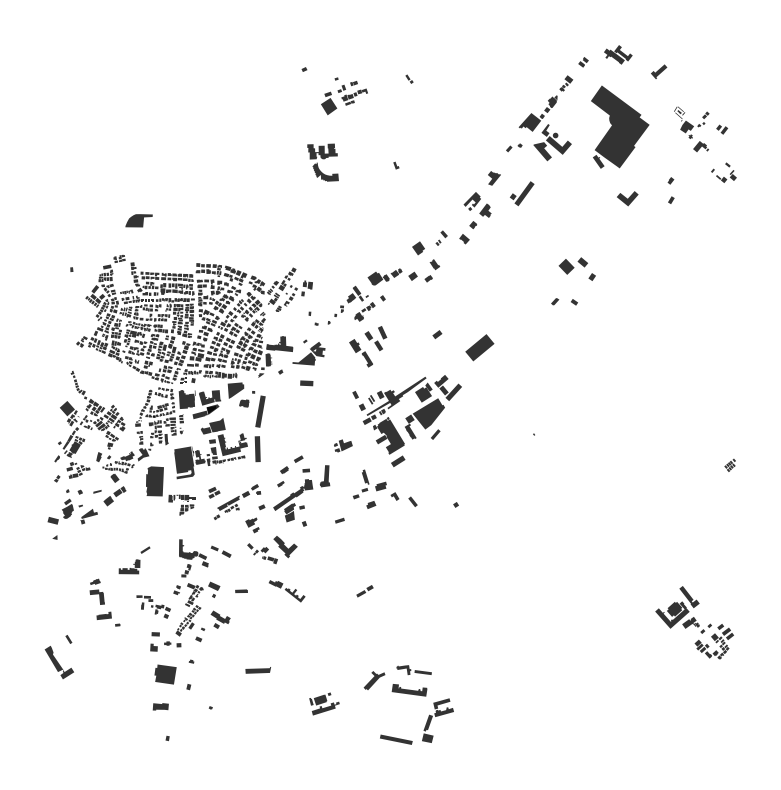

In [23]:
fig,ax = plt.subplots(figsize=(10,10))

osm_web_mercator.plot(ax=ax,
                    color="black",
                    alpha=0.8,
                    )

# get rid of the axis
ax.axis('off');

# basemap from carto that has a dark background (easier to see)
ctx.add_basemap(ax=ax,
                source=ctx.providers.Stamen.TonerLite,
                alpha=0.3 # add transparency to make it less dominant
                )

# Create a function

Whew! That was a lot of work to finally get our building map for a given location. But what if you wanted to repeat this process for *multiple* locations?

Welcome to the world of functions. According to [W3Schools](https://www.w3schools.com/python/python_functions.asp), a python function is:
* A function is a block of code which only runs when it is called.
* You can pass data, known as parameters, into a function.
* A function can return data as a result.

In other words, you create a function (a block of code that does something), and it remains dormant until you call on it. For this lab, let's create a function that creates a building map based on location data that you pass into it.

In [ ]:
# let's make this function together
def your_name():    
    print('My name is Ren')

In [ ]:
# call it
your_name()

In [ ]:
# modify the function to accept arguments
def your_name(name):
    print('My name is ' + name)

In [ ]:
# call it
your_name()

In [ ]:
# call it correctly
your_name('Carolyn')

# or (does the same thing)
your_name(name='Carolyn')

In [ ]:
# add additional parameters
def your_name(firstname, lastname):
    print('My name is ' + firstname + ' ' + lastname)

In [ ]:
your_name('Erik','Felix')

In [ ]:
# provide default values
def your_name(firstname = 'Michael', lastname = 'Jordan'):
    print('My name is ' + firstname + ' ' + lastname)

In [ ]:
# call it with no arguments
your_name()

In [ ]:
# call it with one argument
your_name(firstname = 'Emma')

In [ ]:
# you can also do computations
def f_to_c(f):
    c = (f-32)*5/9 
    return c

In [ ]:
f_to_c(80)

## Create a function that generates a map based on any location

### The anatomy of the function

<img src="images/function.png">

In [ ]:
# function to create a map using open street map
def make_building_map(location):
 
    # get the data from osm
    osm = ox.geometries_from_address(location,
                                     tags={'building':True},
                                     dist=500)
    
    # create the figure as a subplot
    fig,ax = plt.subplots(figsize=(6,6))
    
    # add the map
    osm.plot(ax=ax,
                        color="black",
                        alpha=0.8,
                        )

    # add a title
    ax.set_title(location)

    # get rid of the axis
    ax.axis('off')    

In [ ]:
%%time 
# a "magic" function to display the time it took to run this cell
# run the function once
make_building_map('rome')

# Looping through it

To make the use of functions even more effective, let's create a list of addresses.

In [ ]:
address_list = ['downtown los angeles','new york','kyoto','monrovia','paris','new delhi']

In [ ]:
%%time
# run our function for every address in our list
for address in address_list:
    make_building_map(address)

# Doing other searches

For this lab, we used the tags argument: `'building':True`. This indicates a desire to download *all* buildings for the given geography. There are many other options to filter what you download from OSM. 

* https://wiki.openstreetmap.org/wiki/Map_Features

Examples calls to intake features from OSM:

```python
# for all buildings (could be a very large query)
features = ox.geometries_from_address(place, tags={'building': True})

# for specific buildings
features = ox.geometries_from_address(place, tags={'building': ['retail','industrial','commercial']})

# for amenities
features = ox.geometries_from_address(place, tags={'amenity': ['restaurant','fast_food']})

# for leisure spaces
features = ox.geometries_from_address(place, tags={'leisure': ['park']})
```

Note that when you perform a different search based on a different type of tag, **you may not get the same columns back**. You will need to adjust the code in this lab to reflect the columns that are returned. For example, a tag for "leisure" may not return "buildings", and instead, you may want to color code the map by the column "leisure."